#### Project: Write a data scientist blog post by Mateusz Ploskonka

This workbook is intended to support a blog posted by Mateusz Ploskonka for the Udacity Data Scientist NanoDegree program.
Analysis performed in this project follows CRISP-DM Process (Cross Industry Process for Data Mining) therefore file is structured following this process.

#### Step 1: Business Understanding

In this project I will analyze AirBNB Data for Seattle. Dataset is available here:
https://www.kaggle.com/airbnb/seattle/data

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. The following Airbnb activity is included in this Seattle dataset:
1.Listings, including full descriptions and average review score;
2.Reviews, including unique id for each reviewer and detailed comments;
3.Calendar, including listing id and the price and availability for that day.

From this data I want to understand couple of insights that would be covered by 3 business questions:

 1. In current circumstances of COVID-19 epidemy cleanliness is probably the most critical aspect we should consider. On Airbnb some of the host charge us with additional fee called "cleaning fee". Using Seattle data I want to check if this fee impacts cleanliness that was assessed by visitors in the review scores cleanliness rank?
 
 
 2. Sometimes we face situations where property description is different than reality. As service becomes more and more popular across hosts, maybe this lack of accuracy is caused by fact that new hosts are not experienced with service. Maybe more matured hosts perform better so our question would be:
Does the host tenure on AirBnB impact accuracy of property description?

3. Finally, I want to understand which areas of Seattle get the best scores on the location.


#### Step 2: Data Understanding

In this step I will try to understand data provided by Kaggle. This process will include import of data, data preview and some explanatory analysis.

In [195]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline

In [196]:
# load in the dataset into a pandas dataframe
df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [158]:
# preview first dataframe
df_calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [159]:
# preview basic info about first dataframe
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [160]:
# preview second dataframe
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [161]:
# preview basic info about second dataframe
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [162]:
# preview third dataframe
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [163]:
# preview basic info about third dataframe
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Based on this review I see that questions can be answered by df_listings dataframe. For this dataframe I will perform some more exploration steps.

In [164]:
# describe numerical variables
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Based on the review of data these would be columns I should look on:

'cleaning_fee','review_scores_cleanliness','host_total_listings_count','host_is_superhost','review_scores_accuracy'


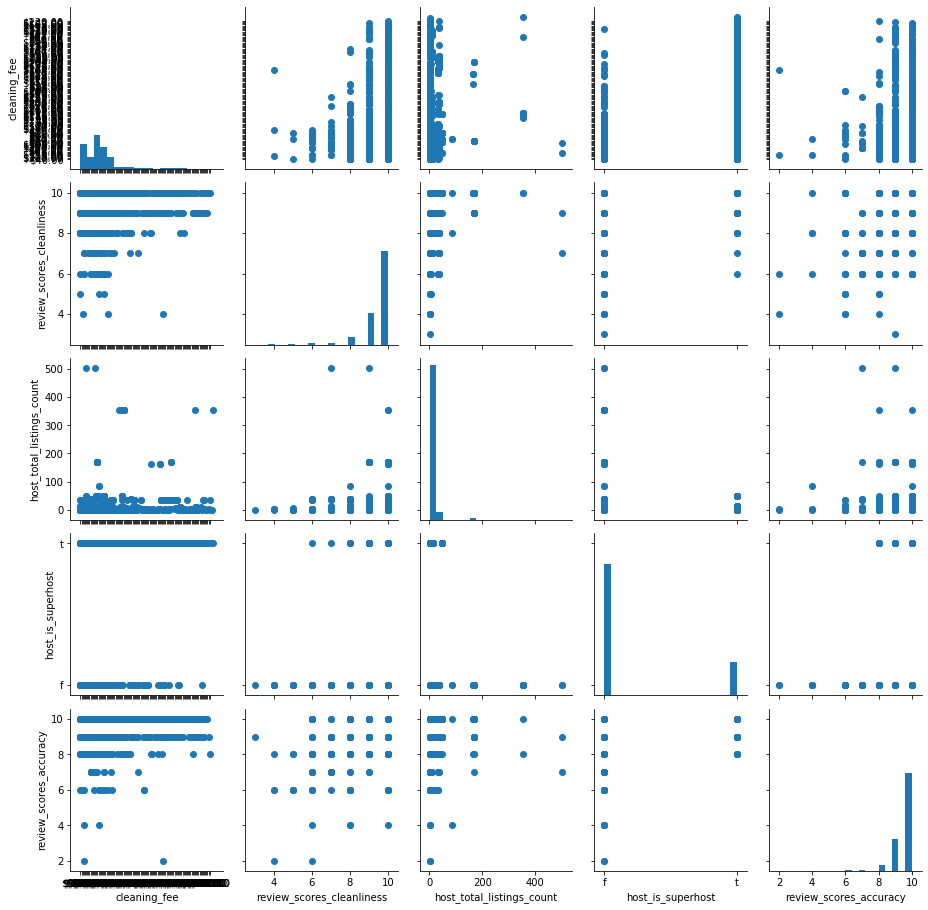

In [165]:
# view of distributions
n_vars = ['cleaning_fee','review_scores_cleanliness','host_total_listings_count','host_is_superhost','review_scores_accuracy']

g = sns.PairGrid(data = df_listings,vars = n_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);


#### Step 3: Prepare Data

In this step I will do some data wrangling and try to use some descriptive and a little inferential statistics to retrieve the results.

In [197]:
# First I will align numeric values that are not numeric to the string type (object type)
df_listings['id'] = df_listings['id'].astype(str)
df_listings['scrape_id'] = df_listings['scrape_id'].astype(str)
df_listings['host_id'] = df_listings['host_id'].astype(str)
df_listings['latitude'] = df_listings['latitude'].astype(str)
df_listings['longitude'] = df_listings['longitude'].astype(str)
df_listings['license'] = df_listings['license'].astype(str)

# Then I will drop not needed columns
df_listings = df_listings.drop(['experiences_offered'], axis=1)



In [198]:
# I will align fees and prices to the numeric values
df_listings['security_deposit'] = df_listings['security_deposit'].str.replace("$", "")
df_listings['security_deposit'] = df_listings['security_deposit'].str.replace(",", "").astype(np.float64)
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace("$", "")
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace(",", "").astype(np.float64)
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace("$", "")
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace(",", "").astype(np.float64)

#### Question 1 -  Does cleaning fee impact cleanliness that was assessed by visitors in the review scores cleanliness rank?

This section will try to answer the question.


Sometimes we observe the cleaning fee is charged to the payment. Some hosts add this item as an additional charge.
It is quite easy to apply for host as per airbnb guidance:
https://www.airbnb.com/help/article/58/how-do-i-add-a-cleaning-fee-to-my-listing

Not all hosts are doing that however I am curious if this charge at all or higher value of it drives better cleanliness. For this I will look at the cleanliness score and amount charged for fee.

In [199]:
# This fee is not mandatory therefore removing NaN values is the best approach. As we want to rely on scores I will drop NaN values as well.
df_listings = df_listings.dropna(subset=['cleaning_fee'], how='any')
df_listings = df_listings.dropna(subset=['review_scores_cleanliness'], how='any')

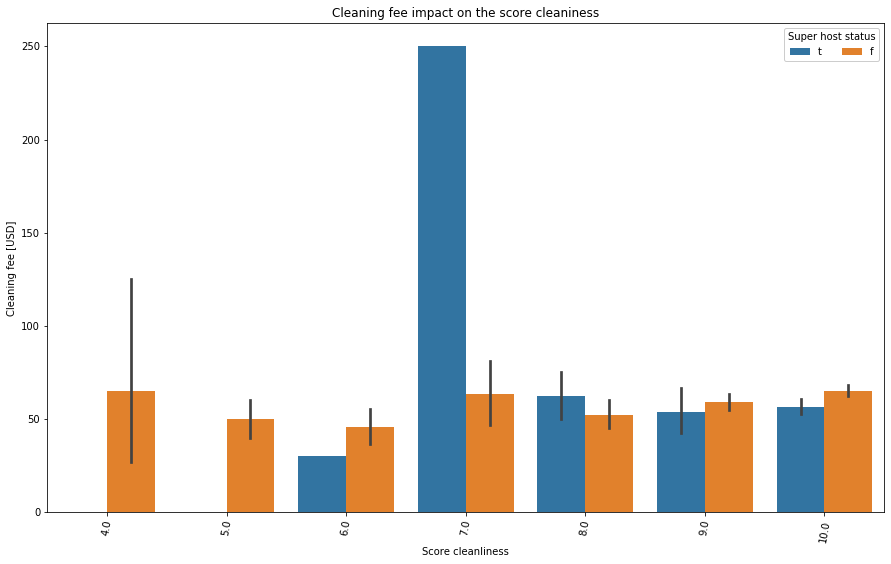

In [200]:
# I will plot graph

plt.figure(figsize=(15,9))
ax = sns.barplot(data = df_listings, x = 'review_scores_cleanliness', y = 'cleaning_fee' , hue = 'host_is_superhost')
ax.legend(loc = 0, ncol = 9, framealpha = 9, title = 'Super host status')
ax.set_title('Cleaning fee impact on the score cleaniness')
plt.xlabel('Score cleanliness')
plt.ylabel('Cleaning fee [USD]')
plt.xticks(rotation = 80);

As it can be seen on the graph higher cleaning fee amounts do not guarantee higher cleanliness rank of the property. Definitely, this fee is not something we should consider as something that increases cleanliness. What is interesting however is the fact that we have found that hosts with super host status (https://www.airbnb.com/help/article/828/what-is-a-superhost) do not get lower scores 4 or 5, so this can be good indicator on how to avoid cleanliness challenges.


#### Question 2 -  Does the host tenure on AirBnB impact the accuracy of property description?

This section will try to answer the question.


Sometimes we face situations where property description is different than reality. As service becomes more and more popular across hosts, maybe this lack of accuracy is caused by the fact that new hosts are not experienced with service. Maybe more matured hosts perform better?


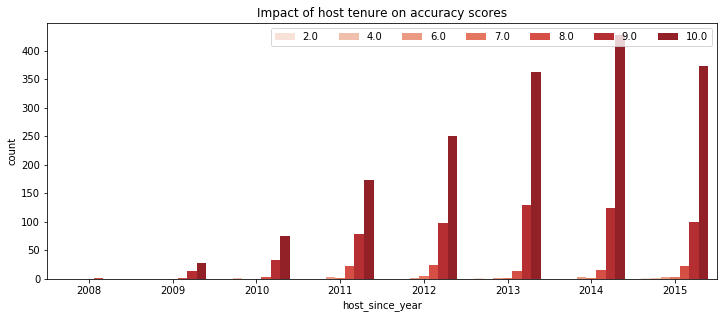

In [213]:
# create column with year
df_listings['host_since_year'] = pd.DatetimeIndex(df_listings['host_since']).year

# plot charts
plt.figure(figsize = [12, 16])
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_listings, x = 'host_since_year', hue = 'review_scores_accuracy', palette = 'Reds')
ax.legend(ncol = 9); # re-arrange legend to reduce overlapping
ax.set_title('Impact of host tenure on accuracy scores');

Above we can observe that we do not have hosts with significant tenure. For these who have joined in 2008 ans 2009 we do not observe scores below 7, however it does not answer question.

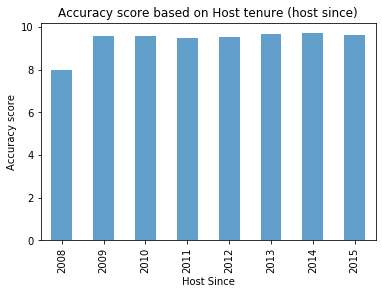

In [216]:
# plot another chart
df_listings.groupby('host_since_year')['review_scores_accuracy'].mean().plot(kind='bar' , title = 'Accuracy score based on Host tenure (host since)',alpha = 0.7);
plt.xlabel('Host Since');
plt.ylabel('Accuracy score');

Here we can see that tenure does not impact accuracy score, so hosts who use Airbnb for a long time do not show better accuracy when describing their properties.

#### Question 3 -  Which areas of Seattle get the best scores on the location.?

This section will try to answer the question.


I want to understand here which areas get the best scores from reviewers.

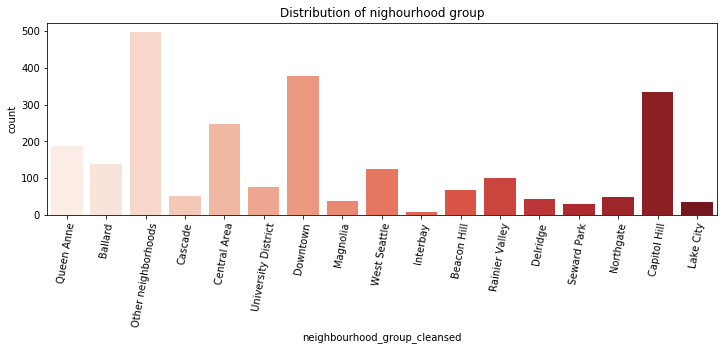

In [221]:
# plot chart
plt.figure(figsize = [12, 12])

ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_listings, x = 'neighbourhood_group_cleansed', palette = 'Reds'); 
plt.xticks(rotation = 80);
ax.set_title('Distribution of nighourhood group');

In [224]:
a = df_listings['neighbourhood_group_cleansed'].value_counts()
a

Other neighborhoods    497
Downtown               379
Capitol Hill           335
Central Area           246
Queen Anne             188
Ballard                139
West Seattle           124
Rainier Valley         100
University District     77
Beacon Hill             69
Cascade                 51
Northgate               49
Delridge                44
Magnolia                38
Lake City               34
Seward Park             29
Interbay                 7
Name: neighbourhood_group_cleansed, dtype: int64

Above chart and view were created to get an overview of distribution of data across neighbourhood groups. I will plot a graph now that will try to answer the question.

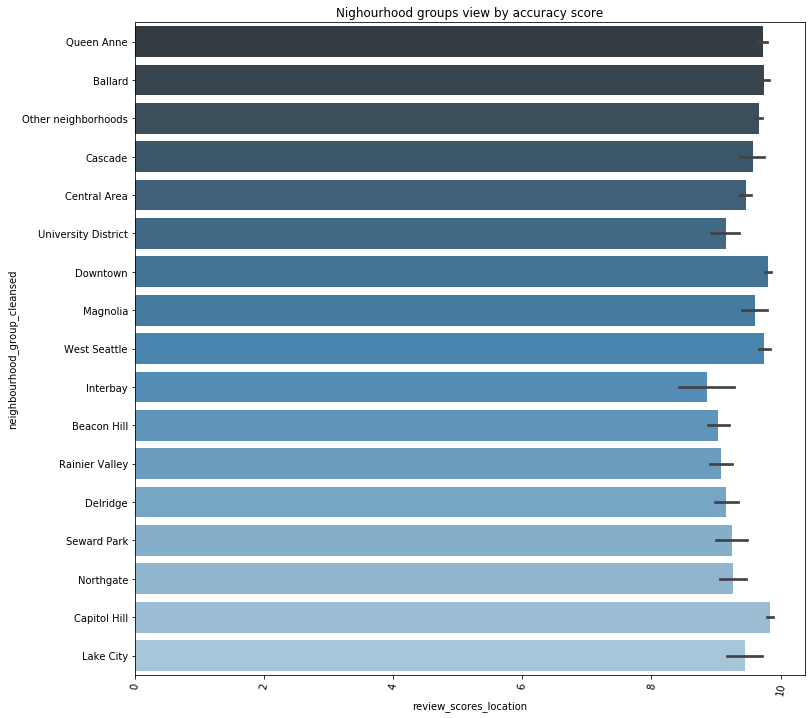

In [226]:
# plot chart
plt.figure(figsize = [12, 12])

gen_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

ax = sns.barplot(data = df_listings, x = 'review_scores_location', y = 'neighbourhood_group_cleansed',palette="Blues_d")
plt.xticks(rotation = 80);
ax.set_title('Nighourhood groups view by accuracy score');

With the above graph we can now answer the question. The highest location scores are getting properties in the Capitol Hill, so next time when you are in Seattle you know where to go.

#### Disclaimer

This analysis was done based on the Airbnb data about Seattle. Pls. remember that data has limited time frame therefore any conclusion currently may not be valid.
